# DS-SF-25 | Lab 07 | Introduction to Regression and Model Fit, Part 2

In [75]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import feature_selection, linear_model

import seaborn as sns

import statsmodels.formula.api as smf 


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [24]:
df = pd.read_csv(os.path.join('..', 'datasets', 'credit.csv'))

In [25]:
df

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,514,4,71,11,Male,No,No,Asian,580
3,148.924,681,3,36,11,Female,No,No,Asian,964
4,55.882,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...
395,12.096,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,296,5,65,17,Male,No,No,African American,480
397,57.872,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,192,1,44,13,Male,No,Yes,Caucasian,0


A description of the dataset is as follows:

- Income (in thousands of dollars)
- Rating: Credit score rating
- Cards: Number of Credit cards owned
- Age
- Education: Years of Education
- Gender: Male/Female
- Student: Yes/No
- Married: Yes/No
- Ethnicity: African American/Asian/Caucasian
- Balance: Average credit card debt

> ## Question 1.  Let's explore the quantitative variables that affect `Balance`.  From your preliminary analysis, which 2 variables seem to affect `Balance` the most?  Our goal is interpretation; can we use these 2 variables simultaneously?  Why or why not?

In [26]:
corr=df.corr()
corr

,Income,Rating,Cards,Age,Education,Balance
Income,1.000000,0.791378,-0.018273,0.175338,-0.027692,0.463656
Rating,0.791378,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.863625,0.086456,0.001835,-0.008062,1.000000


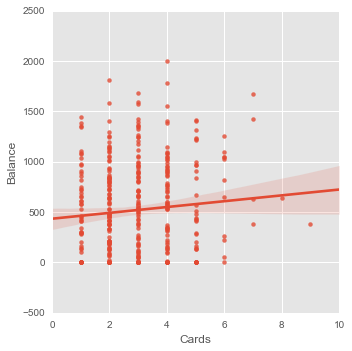

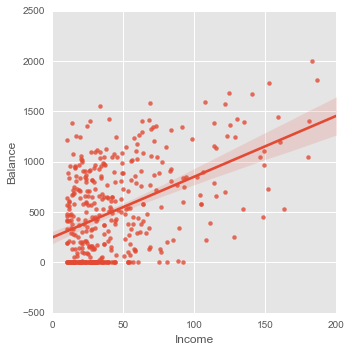

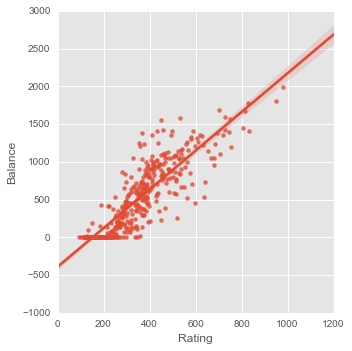

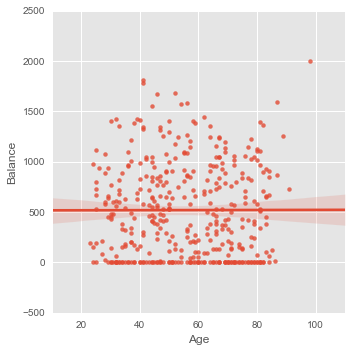

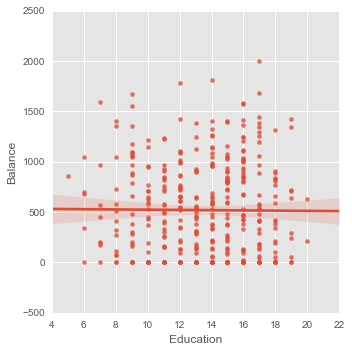

In [59]:
#df.plot(kind = 'scatter', x = 'Income', y = 'Balance', s = 100, figsize = (8, 8))
sns.lmplot('Cards','Balance',df)
sns.lmplot('Income','Balance',df)
sns.lmplot('Rating','Balance',df)
sns.lmplot('Age','Balance',df)
sns.lmplot('Education','Balance',df)

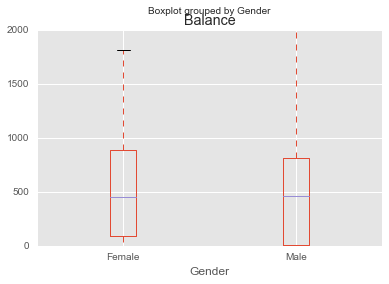

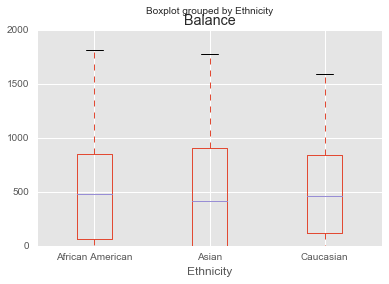

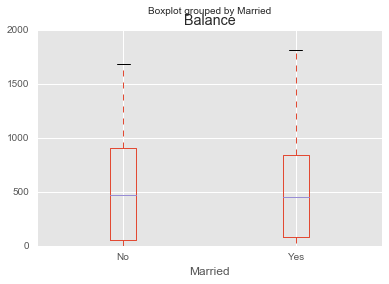

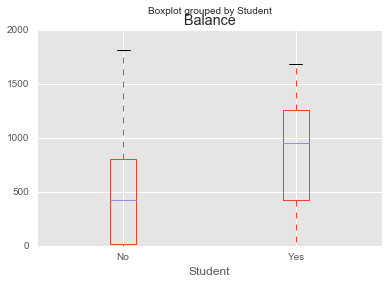

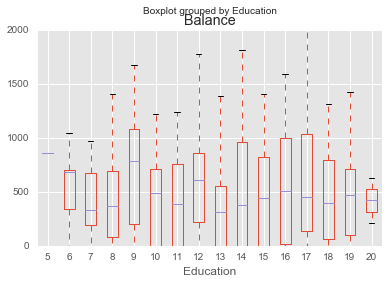

In [70]:
df.boxplot(column='Balance', by='Gender')
df.boxplot(column='Balance', by='Ethnicity')
df.boxplot(column='Balance',by='Married')
df.boxplot(column='Balance',by='Student')
df.boxplot(column='Balance',by='Education')

Answer: Income and rating are both highly positively correlated with balance. However because income and rating are also highly correlated with each other, we may not be able to use them simultaneously

> ## Question 2.  `Race`, `Gender`, `Married`, and `Student` are categorical variables.  Go ahead and create dummy variables for all of them.

In [10]:
# TODO
df.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [73]:
df['is_caucasian']=df.Ethnicity=="Caucasian"
df['is_asian']=df.Ethnicity=="Asian"
df['is_african']=df.Ethnicity=="African American"
df['is_married']=df.Married=="Yes"
df['is_student']=df.Student=="Yes"
df['is_male']=df.Gender=='Male'

> ## Question 3.  Using sklearn and a linear regression, predict `Balance` using `Income`, `Cards`, `Age`, `Education`, `Gender`, and `Race`

First, find the coefficients of your regression line.

In [79]:
model=smf.ols(formula='Balance~Income+Cards+Age+Education+is_male+is_student+is_caucasian+is_asian',data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     20.40
Date:                Sat, 06 Aug 2016   Prob (F-statistic):           8.26e-26
Time:                        15:19:40   Log-Likelihood:                -2949.6
No. Observations:                 400   AIC:                             5917.
Df Residuals:                     391   BIC:                             5953.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              234.2299    124.599      1.880      0.061       -10.737   479.197
is_male[T.True]        -14.6148     39.121     -0.374      0.709       -91.529    62.299
is_student[T.True]     384.1169     65.449      5.869      0.000       255.441   512.792
is_caucasian[T.True]     9.1834     48.073      0.191      0.849       -85.330   103.697
is_asian[T.True]       -15.6186     55.245     -0.283      0.778      -124.233    92.996
Income                   6.1897      0.564     10.978      0.000         5.081     7.298
Cards                   35.2944     14.287      2.470      0.014         7.205    63.384
Age                     -2.1138      1.155     -1.831      0.068        -4.384     0.156
Education               -0.9491      6.281     -0.151      0.880       -13.298    11.400
==============================================================================
Omnibus:                       96.608   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.876
Skew:                           0.209   Prob(JB):                     2.93e-05
Kurtosis:                       1.962   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then, find the p-values of your F-values' models.  You have a few variables try to show your p-values alongside the names of the variables.

In [81]:
model.pvalues

Intercept               6.086825e-02
is_male[T.True]         7.089210e-01
is_student[T.True]      9.362065e-09
is_caucasian[T.True]    8.486005e-01
is_asian[T.True]        7.775460e-01
Income                  1.268778e-24
Cards                   1.392372e-02
Age                     6.792348e-02
Education               8.799713e-01
dtype: float64

> ## Question 4.  Which of your coefficients are significant at the 5% significance level?

Answer: student, income, cards

> ## Question 5.  What is your model's $R^2$?

In [82]:
model.rsquared

0.2944661532184577

> ## Question 6.  How do we interpret this value?

Answer: Only 29.4% of the variance in the data can be explained by the model

> ## Question 7.  Now let's focus on the two most significant variables from your previous model and re-run your regression model.

In [85]:
f

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Sat, 06 Aug 2016   Prob (F-statistic):           9.64e-29
Time:                        15:23:02   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            211.1430     32.457      6.505      0.000       147.333   274.952
is_student[T.True]   382.6705     65.311      5.859      0.000       254.272   511.069
Income                 5.9843      0.557     10.751      0.000         4.890     7.079
==============================================================================
Omnibus:                      119.719   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.617
Skew:                           0.252   Prob(JB):                     7.44e-06
Kurtosis:                       1.922   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ## Question 8.  In comparison to the previous model, did the $R^2$ increase or decrease?  Why?

In [89]:
print model.rsquared
print model2.rsquared

0.294466153218
0.277458888967


Answer: Rsquared decreased, since we can not capture as much variance after removing those variables. 

> ## Question 9.  Now let's regress `Balance` on `Gender` alone.  After running your linear regressions, do you have enough evidence to claim that females have more balance than males?  (Hint: Look at the p-value of the Gender coefficient.  If it is significant then you will have evidence to support that claim, otherwise you cannot support the statement.)

In [93]:
model_gender=smf.ols('Balance~is_male',data=df).fit()
model_gender.pvalues

Intercept          3.312981e-47
is_male[T.True]    6.685161e-01
dtype: float64

Answer: No, the pvalue of the is_male coefficient (in all models so far) show that it is not a significant predictor of Balance. 

> ## Question 10.  Now let's regress `Balance` on `Ethnicity`.  After running your linear regressions, do you have enough evidence to claim that some ethnic groups carry more balance than others?

In [97]:
model_race=smf.ols('Balance~is_caucasian+is_asian',data=df).fit()
model_race.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Sat, 06 Aug 2016   Prob (F-statistic):              0.957
Time:                        15:27:45   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              531.0000     46.319     11.464      0.000       439.939   622.061
is_caucasian[T.True]   -12.5025     56.681     -0.221      0.826      -123.935    98.930
is_asian[T.True]       -18.6863     65.021     -0.287      0.774      -146.515   109.142
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NO, very low Rsquared, and high pvalues for ethnicity coefficients

> ## Question 11.  Finally let's regress `Balance` on `Student`.  After running your linear regressions, do you have enough evidence to claim that students carry more balance than non-students?

In [100]:
model_student=smf.ols('Balance~is_student',data=df).fit()
model_student.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Sat, 06 Aug 2016   Prob (F-statistic):           1.49e-07
Time:                        15:28:49   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            480.3694     23.434     20.499      0.000       434.300   526.439
is_student[T.True]   396.4556     74.104      5.350      0.000       250.771   542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, the pvalue is very low for the is_student coefficient

> ## Question 12.  No let's consider the effect of `Student` and `Income` on `Balance` simultaneously.  Are all the coefficients significant?

In [101]:
model2.pvalues

Intercept             2.338288e-10
is_student[T.True]    9.775720e-09
Income                7.817642e-24
dtype: float64

Answer: In the combined model, the coeffiencts for is_student and income are both signficant (p value <<< .05)

> ## Question 13.  No let's consider the interaction effect of `Student` and `Income` on `Balance` simultaneously.  Are all the coefficients significant?  It they are, write down your regression model below

(First generate a new variable for the interaction term)

In [102]:
model_interaction=smf.ols('Balance~is_student+Income+is_student*Income',data=df).fit()

In [103]:
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Sat, 06 Aug 2016   Prob (F-statistic):           4.94e-28
Time:                        15:31:39   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                   200.6232     33.698      5.953      0.000       134.373   266.873
is_student[T.True]          476.6758    104.351      4.568      0.000       271.524   681.827
Income                        6.2182      0.592     10.502      0.000         5.054     7.382
is_student[T.True]:Income    -1.9992      1.731     -1.155      0.249        -5.403     1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: is_student and Income coefficients are significant. However the student*income interaction coefficient is not.

> ## Question 14.  Is there any income level at which students and non-students on average carry same level of balance?

Answer: (Using model2) When 382.6705*student=5.9843*income